## 1 导入数据

In [1]:
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

unique_risk = pd.read_csv('unique_risk.csv')

In [3]:
#将审核结果编码为0和1，作为一个可以进行机器学习的指标 （认为“发行股份购买资产获无条件通过”比“发行股份购买资产获有条件通过”好）
#删除公司名称列，该列无法作为特征学习的指标
unique_risk['审核结果']=unique_risk['审核结果'].map({'发行股份购买资产获无条件通过':1,'发行股份购买资产获有条件通过':0})
unique_risk.head(5)

,Rc,审核结果,上一年归母净利润（万元）,承诺期业绩增长率,前三年承诺覆盖率,静态市盈率,动态市盈率,成立年限,大股东持股比例,最近一个完整会计年度对第一大客户的销售占比,...,固定资产周转率,流动比率,资产负债率,经营杠杆（EBITDA/EBIT),（固定资产+土地）/归母权益,在建工程/归母权益,净资产收益率,毛利率,经营性现金流/收入,研发支出占比
0,0.020,1,15972.0,0.20,0.27,16.47,12.84,17.94,1.00,0.39,...,928.92,1.78,0.55,1.00,0.01,0.00,0.38,0.09,0.02,0.00
1,0.020,0,4443.0,0.27,0.33,15.37,11.68,9.04,0.35,0.23,...,17.93,1.64,0.56,1.03,0.23,0.00,0.69,0.45,0.11,0.04
2,0.010,1,5349.0,0.24,0.25,19.22,13.88,13.56,0.51,0.14,...,1087.77,1.37,0.73,1.02,0.01,0.00,0.23,0.06,0.00,0.00
3,0.005,1,14478.0,0.18,0.30,15.01,11.94,20.32,0.51,0.08,...,147.85,1.61,0.60,1.03,0.05,0.01,0.23,0.09,0.04,0.00
4,0.005,1,14798.0,0.20,0.32,14.19,10.77,16.07,0.51,0.05,...,620.62,1.23,0.81,1.02,0.02,0.00,0.43,0.07,0.04,0.00


In [4]:
#按照顺序构造字典，方便将最后的特征选择结果输出为具体的属性名称
feature_dict={
0:'审核结果',1:'上一年归母净利润（万元）',2:'承诺期业绩增长率',3:'前三年承诺覆盖率',4:'静态市盈率',5:'动态市盈率',6:'成立年限',
7:'大股东持股比例',8:'最近一个完整会计年度对第一大客户的销售占比',9:'最近一个完整会计年度对第一供应商的采购占比',10:'注入资产净资产账面值(万元)',
11:'D/(D+E)',12:'总资产增长率' ,13:'归母权益增长率',14:'净利润增长率',15:'总资产周转率',16:'存货周转率',17:'应收账款周转率',18:'固定资产周转率',
19:'流动比率',20:'资产负债率',21:'经营杠杆（EBITDA/EBIT)',22:'（固定资产+土地）/归母权益',23:'在建工程/归母权益',24:'净资产收益率',
25:'毛利率',26:'经营性现金流/收入',27:'研发支出占比'
}

In [5]:
target=unique_risk['Rc']

In [6]:
data=unique_risk.drop(labels=['Rc'],axis=1)

In [7]:
#存储列名，用于展示结果
columns=data.columns

In [8]:
#选取90%的样本用于训练模型，10%用于展示模型
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(data,target, test_size = 0.1, random_state=23)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
train_X = scaler.fit_transform(train_data)
train_y = train_target
test_X= scaler.transform(test_data)
test_y=test_target

尝试用iforest, One-SVM 或者 Leave-One-Out方法的结果检测异常值，效果都不好，因此从该版中删除

## 2 不进行特征工程，直接进行机器学习

### 2.1 选择回归模型
&ensp; 以线性回归的模型作为对照组，选择岭回归、神经网络、AdaBoost、LGBM和XGBoost方法进行机器学习。选择岭回归的原因是一般L2正则化比L1正则化好。SVM回归根据经验表现并不好。多层感知机能处理高维非线性问题。Boosting类算法通常表现比Bagging类算法好。树类模型和KNN更适合分类问题。

In [ ]:
#为了保证模型和计算结果的可复现性，和之前选择测试集一样 选择随机数种子23（实际不需要，只需要多次实验取最高保存）,见前文模型罗列阶段的参数

In [10]:
#线性回归
from sklearn import linear_model
model_LinearRegression = linear_model.LinearRegression()

# 岭回归
from sklearn.linear_model import RidgeCV
model_RidgeCV= RidgeCV()

#MLPRegressor神经网络回归
from sklearn.neural_network import MLPRegressor
model_MLPRegressor=MLPRegressor(random_state=23)

#Adaboost回归
from sklearn import ensemble
model_AdaBoostRegressor = ensemble.AdaBoostRegressor(n_estimators=50,random_state=23)#这里使用50个决策树

#LGBM回归
import lightgbm as lgb
model_LGBMRegressor= lgb.LGBMRegressor()

#XGBoost回归
import xgboost as xgb
model_XGBRegressor = xgb.XGBRegressor()

### 2.2 模型基础表现
&ensp; 由于数据量不够大，为了避免采样结果对评判指标（这里使用$R^2$进行评估）产生比较大的影响，因此采用k折交叉验证（这里k取5）取平均值的方法评估模型及其超参数的优劣（对未知的测试数据是否也能有比较好的预测表现）。<br> 
&ensp; 当样本足够大的时候（比如达到假设空间的70%）,一般直接70% 30%或者60% 20% 10%的方法进行划分，对模型进行调参和评估。实践表明，训练集、测试集，验证集的方法比K折交叉验证效果更好<br>

In [11]:
#导入交叉验证包
from sklearn.model_selection import cross_val_score

**线性回归**

In [12]:
#交叉验证 计算平均值
score=[]
score=cross_val_score(model_LinearRegression,train_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[-4.31859267 -2.20635012 -1.73417002 -0.39247642 -0.18406846]


-1.7671315362442512

**岭回归**

In [67]:
score=[]
score=cross_val_score(model_RidgeCV,train_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[ 0.01006675  0.0547355  -0.45696984 -0.24978267  0.18121692]


-0.09214666509499606

**多层感知机**

In [68]:
score=[]
score=cross_val_score(model_MLPRegressor,train_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[ -58.63902525 -137.34028909  -35.15893586  -14.83856555  -62.53089236]


-61.70154162115184

**AdaBoost**

In [69]:
score=[]
score=cross_val_score(model_AdaBoostRegressor,train_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[-0.0067154   0.10619383  0.11138641  0.04044471  0.14353388]


0.07896868703619757

**LGBM**

In [70]:
score=[]
score=cross_val_score(model_LGBMRegressor,train_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[-0.05193114 -0.07705426 -0.10868525 -0.16768306  0.29705026]


-0.021660688785657523

**XGBoost**

In [71]:
score=[]
score=cross_val_score(model_XGBRegressor,train_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[-0.16034206  0.2733736  -0.30593974 -0.82164314 -0.08033326]


-0.21897692172226155

### 2.3 模型调参
&ensp; 调参指的都是调整超参数,使得模型具有更好的表现。一般来说越复杂的超参数(神经网络中更多的感知机，决策树中数的深度越大，线性拟合中x的最高指数), 会使得模型在训练集上具有更好的表现，但容易导致模型过拟合，在未知数据集上表现不佳。因此，使用K折交叉验证或者划分训练和测试集的方法确定来确定最佳的模型+超参数组合。<br>
&ensp;调参的一般方法就是通过GridSearch函数将所有参数进行组合，通过交叉验证或者测试集的方法输出最好的模型（一般会选择准确率或者$R^2$，但可能也会关注比如预测时间、训练时间等指指标）。由于会遍历所有组合，一般会选择一个范围，接着逐步进行逼近。另外，为了避免陷入局部最优，可以尝试几个不同的区间进行逼近。

&ensp; 需要注意的是，K折交叉验证会生成K个参数不同的模型，这些模型都不是我们的最终模型，K折交叉验证主要是用来测试这个模型和超参数组合在假设空间上的表现，并不是一个生成训练模型的方法。我们使用通过K折交叉验证选出的最好的模型+超参数组合，训练目前已有数据得出的参数+模型才是最终持久化保存并使用的模型。<br>

In [10]:
from sklearn.model_selection import GridSearchCV  

**对MLP神经网络进行调参**<br>
&ensp;默认只有一层(200,)的效果很差。调参时神经网络的必要步骤。

In [72]:
parameter_space = {
    'hidden_layer_sizes': [(5,5,5),(3,3,3),(3,3,3,3)], 
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.0002,0.0005],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(MLPRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(train_X,train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'solver': 'lbfgs'} with a score of -0.05


In [73]:
model_MLPRegressor=MLPRegressor(activation='tanh', alpha=0.0001, hidden_layer_sizes=(3,3,3), learning_rate='constant', solver='lbfgs',random_state=23)

In [74]:
score=[]
score=cross_val_score(model_MLPRegressor,train_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[-0.0657214   0.01119044 -0.0106349  -0.23491783  0.03798471]


-0.05241979719935137

**对XGBoost进行调参**

In [75]:
parameter_space = {
    'booster': ['gbtree','dart'], 
    'eta': [0.1, 0.2, 0.3],
    'gamma':[0,1,10],
    'max_depth': [ 6, 9, 12],
    'min_child_weight': [5, 10 ,20]
    
}

grid = GridSearchCV(xgb.XGBRegressor(), parameter_space, cv=5)  
grid.fit(train_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'booster': 'dart', 'eta': 0.2, 'gamma': 0, 'max_depth': 9, 'min_child_weight': 10} with a score of 0.06


In [76]:
model_XGBRegressor= xgb.XGBRegressor(booster='dart', eta= 0.2, gamma= 0, max_depth= 9, min_child_weight= 10)

In [77]:
score=[]
score=cross_val_score(model_XGBRegressor,train_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[-0.0645823   0.21442871  0.01261287  0.04288464  0.09591336]


0.06025145492136637

**对LGBM进行调参**

In [78]:
parameter_space = {
    'max_depth': [2,4,6],
    'num_leaves': [3,5,10],
    'min_child_samples': [15,19,30],
    'min_child_weight': [0.001,0.002],
    'cat_smooth': [0,10,20]
    
}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_space, cv=5)  
grid.fit(train_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'cat_smooth': 0, 'max_depth': 4, 'min_child_samples': 19, 'min_child_weight': 0.001, 'num_leaves': 5} with a score of 0.15


In [86]:
model_LGBMRegressor=lgb.LGBMRegressor(cat_smooth=0, max_depth=4, min_child_samples=19, min_child_weight=0.001, num_leaves=5)

In [87]:
score=[]
score=cross_val_score(model_LGBMRegressor,train_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[-0.0817186   0.16682566 -0.0382546   0.23991201  0.44190385]


0.14573366308017338

**对AdaBoost进行调参**

In [17]:
Ada_MLP=MLPRegressor(activation='tanh', alpha=0.0001, hidden_layer_sizes=(3,3,3), learning_rate='constant', solver='lbfgs',random_state=23)

In [14]:
from sklearn import tree

In [83]:
parameter_space = {
    'base_estimator':[tree.DecisionTreeRegressor(max_depth=3),model_RidgeCV,Ada_MLP],
    'n_estimators':[150,200,250],
    'learning_rate':[0.1,0.5,0.8]
}

grid = GridSearchCV(ensemble.AdaBoostRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(train_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.5, 'n_estimators': 200} with a score of 0.14


In [84]:
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(base_estimator= tree.DecisionTreeRegressor(max_depth=3),random_state=23,learning_rate=0.5, n_estimators=200)

In [85]:
score=[]
score=cross_val_score(model_AdaBoostRegressor,train_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[0.09079508 0.20643547 0.12139624 0.07877288 0.20435412]


0.14035076034981703

**调参结果对比**<br>

| 模型 | 调参前 | 调参后 |
|------|----------|------|
| Adaboost回归  | 0.0789 | 0.1403   |
| XGBOOST回归   | -0.2189 | 0.0603   |
| LGBM回归     | -0.0217 | 0.1457    |
| 神经网络回归  | -61.7015 | -0.0524 |


&emsp;从交叉验证的结果来看，部分组的分数远远低于其他组的分数。因此我认为部分组中可能存在异常值。但由于cross_val_score不会返回分组结果，因此无法直接对原因进行分析

## 3 特征选择

&emsp;不考虑通过Polynomial Features构造 如$x^2$, $xy$等多项式特征，我觉得这种特征对于该问题没有意义，也不考虑对年限等进行取对数操作。

### 3.1 特征选择: Filter
&emsp;&emsp;基本思路是通过统计学变量，计算自变量和目标变量之间的关联，选择相关性比较高的属性。常用的统计学变量和方法有相关系数，卡方检验，信息增益<br>

**相关系数**

<AxesSubplot:>

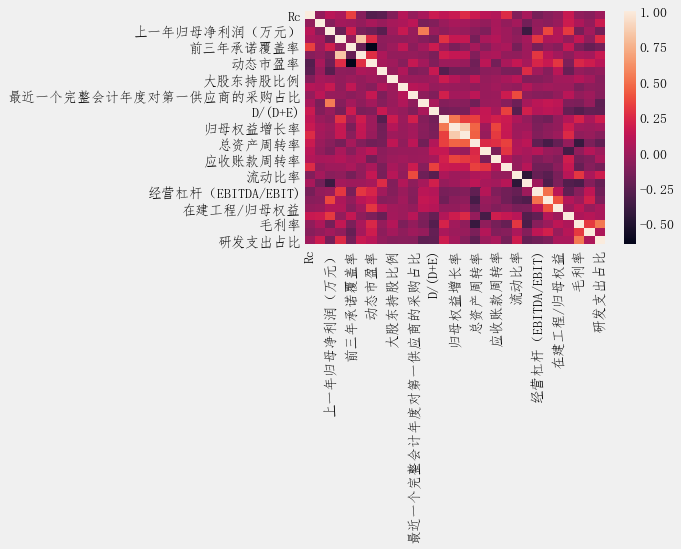

In [179]:
# 用Seaborn 生成热图
import seaborn as sns
import matplotlib.style as style
# 选用一个干净的主题
style.use('fivethirtyeight')
sns.heatmap(unique_risk.corr())

In [180]:
# 存储特征
highly_correlated_features =unique_risk.columns[unique_risk.corr()['Rc'].abs() > .2]
highly_correlated_features=highly_correlated_features.drop('Rc') 
highly_correlated_features

Index(['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率'], dtype='object')

In [181]:
new_data=train_data[['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率']]
train_new_X=scaler.fit_transform(new_data)

**线性回归**

In [91]:
score=[]
score=cross_val_score(model_LinearRegression,train_new_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[ 0.00928273  0.10659351 -0.22917129  0.01439723  0.10522362]


0.001265161297745432

**岭回归**

In [92]:
score=[]
score=cross_val_score(model_RidgeCV,train_new_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[ 0.06780488  0.13702167  0.1157161  -0.04762181  0.44906259]


0.14439668666666622

**MLP神经网络**

In [93]:
parameter_space = {
    'hidden_layer_sizes': [(5,5,5),(3,3,3),(3,3,3,3)], 
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.0002,0.0005],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(MLPRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'activation': 'tanh', 'alpha': 0.0002, 'hidden_layer_sizes': (3, 3, 3), 'learning_rate': 'constant', 'solver': 'lbfgs'} with a score of 0.17


In [94]:
score=[]
model_MLPRegressor=MLPRegressor(random_state=23,activation= 'tanh', alpha=0.0001, hidden_layer_sizes= (3,3,3), learning_rate='constant', solver= 'lbfgs')
score=cross_val_score(model_MLPRegressor,train_new_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[ 0.19703737  0.07417909 -0.0401558   0.22921233  0.40687539]


0.173429674960313

**LGBM回归**

In [95]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'max_depth': [1,4,8],
    'num_leaves': [1,3,5],
    'min_child_samples': [20,30,35],
    'min_child_weight': [0.001,0.002],
    'cat_smooth': [0,10] 
}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'cat_smooth': 0, 'max_depth': 4, 'min_child_samples': 30, 'min_child_weight': 0.001, 'num_leaves': 3} with a score of 0.04


In [97]:
from sklearn import tree
model_LGBM=lgb.LGBMRegressor(cat_smooth=0, max_depth=4, min_child_samples=30, min_child_weight=0.001, num_leaves=3)
score=[]
score=cross_val_score(model_LGBM,train_new_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[-0.025027    0.11711942  0.10916168 -0.3444433   0.366358  ]


0.04463376090215447

**XGBoost回归**

In [98]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'eta': [0.1, 0.2, 0.3],
    'gamma':[0,1],
    'max_depth': [1, 3, 6],
    'min_child_weight': [1, 10]
}

grid = GridSearchCV(xgb.XGBRegressor(), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'eta': 0.1, 'gamma': 0, 'max_depth': 1, 'min_child_weight': 1} with a score of 0.06


In [100]:
from sklearn import tree
model_XGBRegressor=xgb.XGBRegressor(eta=0.1, gamma=0, max_depth=1, min_child_weight=1)
score=[]
score=cross_val_score(model_XGBRegressor,train_new_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[ 1.04079401e-04  6.41916054e-02 -2.27708362e-02 -2.84638564e-01
  5.25140296e-01]


0.05640531605645267

**AdaBoost回归**

In [182]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'base_estimator':[tree.DecisionTreeRegressor(max_depth=3),model_RidgeCV,Ada_MLP],
    'n_estimators':[10,15,20],
    'learning_rate':[0.3,0.5,0.8]
}

grid = GridSearchCV(ensemble.AdaBoostRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'base_estimator': MLPRegressor(activation='tanh', hidden_layer_sizes=(3, 3, 3), random_state=23,
             solver='lbfgs'), 'learning_rate': 0.3, 'n_estimators': 15} with a score of 0.19


In [183]:
from sklearn import tree
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(random_state=23,base_estimator=Ada_MLP, learning_rate=0.3, n_estimators= 15)
score=[]
score=cross_val_score(model_AdaBoostRegressor,train_new_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[ 0.01093179  0.22512656  0.24261708 -0.05963419  0.51229208]


0.1862666637986496

**假设检验**

In [184]:
#ANOVA测试
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

In [185]:
#保留一半，14个特征
k_best=SelectKBest(f_regression, k=14)

In [186]:
k_best.fit_transform(train_X, train_y);

In [187]:
p_values=pd.DataFrame({'Column': columns,'p_value':k_best.pvalues_}).sort_values('p_value')

In [188]:
p_values[p_values['p_value']<.05]

,Column,p_value
3,前三年承诺覆盖率,0.000220
6,成立年限,0.000546
14,净利润增长率,0.001216
18,固定资产周转率,0.002355
5,动态市盈率,0.004184
15,总资产周转率,0.040629
13,归母权益增长率,0.046219


In [189]:
train_new_data=train_data[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
train_new_X=scaler.fit_transform(train_new_data)

**线性回归**

In [109]:
score=[]
score=cross_val_score(model_LinearRegression,train_new_X,train_y,cv=5,scoring='r2')
score.mean()

0.12878605696975773

**岭回归**

In [110]:
score=[]
score=cross_val_score(model_RidgeCV,train_new_X,train_y,cv=5,scoring='r2')
score.mean()

0.1552500085397836

**MLP神经网络**

In [111]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'hidden_layer_sizes': [(5,5,5),(3,3,3),(3,3,3,3)], 
    'activation': ['tanh', 'relu','logistic'],
    'solver': ['sgd', 'adam','lbfgs'],
    'alpha': [0.0001, 0.0002,0.0005],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(MLPRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'activation': 'relu', 'alpha': 0.0002, 'hidden_layer_sizes': (5, 5, 5), 'learning_rate': 'constant', 'solver': 'lbfgs'} with a score of 0.22


In [118]:
model_MLPRegressor=MLPRegressor(random_state=23,activation='relu', alpha= 0.0002, hidden_layer_sizes= (5, 5, 5), learning_rate= 'constant', solver= 'lbfgs')
score=[]
score=cross_val_score(model_MLPRegressor,train_new_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[0.13134302 0.18476033 0.19045285 0.0558244  0.53435174]


0.21934646772485095

**LGBM回归**

In [113]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'max_depth': [1,4],
    'num_leaves': [1,3,10],
    'min_child_samples': [30,40,50],
    'min_child_weight': [0.001,0.002],
    'cat_smooth': [0,10] 
}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'cat_smooth': 0, 'max_depth': 1, 'min_child_samples': 40, 'min_child_weight': 0.001, 'num_leaves': 3} with a score of 0.08


In [114]:
model_LGBMRegressor=lgb.LGBMRegressor(random_state=23,cat_smooth=0, max_depth=1, min_child_samples=40, min_child_weight=0.001, num_leaves= 3)
score=[]
score=cross_val_score(model_LGBMRegressor,train_new_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[ 0.12500515  0.09547008  0.23955858 -0.39633622  0.33178057]


0.07909563324748807

**XGBoost回归**

In [115]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'eta': [0.1, 0.2],
    'gamma':[0,1,10],
    'max_depth': [1,3, 6],
    'min_child_weight': [1, 10]
}


grid = GridSearchCV(xgb.XGBRegressor(), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'eta': 0.1, 'gamma': 0, 'max_depth': 1, 'min_child_weight': 1} with a score of 0.07


In [116]:
from sklearn import tree
model_XGBRegressor=xgb.XGBRegressor(random_state=23,eta=0.1, gamma=0, max_depth=1, min_child_weight=1)
score=[]
score=cross_val_score(model_XGBRegressor,train_new_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[-0.00180847  0.09033975  0.04544565 -0.27383063  0.49896364]


0.07182198821160175

**AdaBoost回归**

In [191]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'base_estimator':[tree.DecisionTreeRegressor(max_depth=3),model_RidgeCV,Ada_MLP],
    'n_estimators':[15,20,25],
    'learning_rate':[0.001,0.1,0.3]
}

grid = GridSearchCV(ensemble.AdaBoostRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'base_estimator': MLPRegressor(activation='tanh', hidden_layer_sizes=(3, 3, 3), random_state=23,
             solver='lbfgs'), 'learning_rate': 0.1, 'n_estimators': 20} with a score of 0.16


In [193]:
from sklearn import tree
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(random_state=23,base_estimator=Ada_MLP, learning_rate=0.1, n_estimators= 20)
score=[]
score=cross_val_score(model_AdaBoostRegressor,train_new_X,train_y,cv=5,scoring='r2')
print(score)
score.mean()

[ 0.14615462  0.1506935   0.1863582  -0.06621946  0.38797684]


0.1609927389816905


**特征选择结果对比**<br>

&emsp;相关系数选择结果: 前三年承诺覆盖率, 动态市盈率, 成立年限, 净利润增长率, 固定资产周转率<br>
&emsp;P值选择结果：    前三年承诺覆盖率, 成立年限, 净利润增长率, 固定资产周转率, 动态市盈率, 总资产周转率, 归母权益增长率


| 模型 | 特征选择前 | 相关系数特征选择 | P值特征选择|
|------|----------|------| ------|
|线性回归|  -1.7671	| 0.0012 | 0.1288 |
|岭回归 | -0.0921 | 0.1443 | 0.1552 |
| Adaboost回归  | 0.1403 | 0.1863   | 0.1610 |
| XGBOOST回归   | 0.0603 | 0.0564  | 0.0718 |
| LGBM回归     | 0.1457 |  0.0446   | 0.0791 |
| 神经网络回归  | -0.0524 | 0.1734 | 0.2193 |


&emsp;除LGBM模型外，其他模型在进行特征选择后效果有提升。一般来说，通过P值检验法进行特征选择的模型得分比相关性特征选择的得分高。<br>
&emsp;总资产周转率, 归母权益增长率提供了信息增益。前三年承诺覆盖率, 成立年限, 净利润增长率, 固定资产周转率, 动态市盈率, 总资产周转率, 归母权益增长率是选择法的结果

### 3.2 特征选择：Wrapper
思路：通过目标函数来决定是否加入一个变量。

**最佳子集回归（Best Subset Regression）**<br>
&emsp;通过遍历所有可能的组合，找出最好的特征组合。<br>
由于 $C_{n}^{1}+C_{n}^{2}+C_{n}^{3}+ ... +C_{n}^{n}=2^n$  &emsp; 因此对于具有大量属性(20个以上，2^20=1048576，建议跑分布式解决)的问题，这个方法并不适用。

In [ ]:
#不运行
results = pd.DataFrame(columns=['num_features', 'features', 'R2'])


for k in range(1, X_train.shape[1] + 1):
    for subset in itertools.combinations(range(X_train.shape[1]), k):
        linreg_model = LinearRegression.fit(X_train[:, subset], y_train)
        score = linreg_model.score(X_train[:, subset],y_train)
        results = results.append(pd.DataFrame([{'num_features': k, 'features': subset,'R2': score}]))

# 根据R^2的值进行排序
results = results.sort_values('R2').reset_index()
print(results.head())

# 拟合最优模型

# get corresponding feature describe
feature_describe = data.columns.tolist()[1:-2]
best_subset_feature_index = results['features'][0]
best_subset_feature_describe = []
for index in best_subset_feature_index:
    best_subset_feature_describe.append(feature_describe[index])


best_subset_model = LinearRegression(normalize=True).fit(X_train[:, results['features'][0]], y_train)
best_subset_coefs = dict(
    zip(['Intercept'] + best_subset_feature_describe,
        np.round(np.concatenate((best_subset_model.intercept_, best_subset_model.coef_), axis=None), 3))
)

print('Best Subset Regression R2: {}'.format(np.round(results['R2'][0], 3)))
print('Best Subset Regression coefficients:', best_subset_coefs)

**feature_selection.RFECV，递归特征消除法**<BR>
&emsp;递归特征删除法,不断训练模型，每次训练完毕删除掉n个重要性低的特征，然后对新的特征再次进行训练，又一次得到特征重要性，再次删除n个重要性低的特征，直到特征数满足自己的设定。通过交叉验证来找到最优的特征数量，这里的交叉验证与我们经常见到的不同，不是不同行组合然后求平均，而是不同列的组合求均值，得到最优的特征数量。如果减少特征会造成性能损失，那么将不会去除任何特征。<br>
&emsp;需要指出的是，由于无法证明特征选择的结果具有最优子结构性质，因此这种基于贪心算法的特征选择方法只能保证获得局部最优，无法保证获取全局最优。进一步的改进方法为基于遗传算法，设置多组特征集和随机数，选择最优解。

**线性回归回归**

In [111]:
#对于线性回归通过RFECV进行特征选择
from sklearn.feature_selection import RFECV
from sklearn import ensemble

estimator =model_LinearRegression

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(train_X, train_y)

# 哪些特征入选最后特征，true表示入选
#print(selector.support_)
# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
#print(selector.ranking_)
# 每次交叉迭代各个特征得分
#print(selector.grid_scores_)

#  挑选了几个特征
print(selector.n_features_)

1


In [112]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

In [113]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.coef_}).sort_values('feature_importances',ascending=False)

In [114]:
feature_importances_value

,Feature,feature_importances
0,净利润增长率,0.03096


In [116]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)

In [117]:
score=[]
score=cross_val_score(estimator,train_new_X,train_y,cv=5,scoring='r2')
score.mean()

-0.22215488270654243

**AdaBoost**

先进行调参再进行特征选择

In [194]:
from sklearn.feature_selection import RFECV
from sklearn import ensemble

model_AdaBoostRegressor=ensemble.AdaBoostRegressor(base_estimator= tree.DecisionTreeRegressor(max_depth=3),random_state=23,learning_rate=0.1, n_estimators=200)
estimator = model_AdaBoostRegressor

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(train_X, train_y)

# 哪些特征入选最后特征，true表示入选
#print(selector.support_)
# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
#print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)

27


In [195]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

In [196]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [197]:
feature_importances_value

,Feature,feature_importances
13,净利润增长率,0.120953
2,前三年承诺覆盖率,0.091437
1,承诺期业绩增长率,0.078579
5,成立年限,0.077518
11,总资产增长率,0.072038
10,D/(D+E),0.044199
0,上一年归母净利润（万元）,0.041237
6,大股东持股比例,0.040775
8,最近一个完整会计年度对第一供应商的采购占比,0.039548
23,净资产收益率,0.036880


In [198]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)

In [201]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'base_estimator':[tree.DecisionTreeRegressor(max_depth=3),model_RidgeCV,Ada_MLP],
    'n_estimators':[100,150,200],
    'learning_rate':[0.1,0.5,0.8]
}

grid = GridSearchCV(ensemble.AdaBoostRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.5, 'n_estimators': 150} with a score of 0.15


In [202]:
score=[]
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(base_estimator= tree.DecisionTreeRegressor(max_depth=3),random_state=23,learning_rate=0.5, n_estimators=150)
score=cross_val_score(model_AdaBoostRegressor,train_new_X,train_y,cv=5,scoring='r2')
score.mean()

0.15467403613918074

先进行特征选择再进行特征选择

In [74]:
from sklearn.feature_selection import RFECV
from sklearn import ensemble

estimator = ensemble.AdaBoostRegressor(random_state=23)

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(train_X, train_y)

# 哪些特征入选最后特征，true表示入选
#print(selector.support_)
# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
#print(selector.ranking_)

# 每次交叉迭代各个特征得分
#print(selector.grid_scores_)

#  挑选了几个特征
print(selector.n_features_)

21


In [75]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

In [76]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [77]:
feature_importances_value

,Feature,feature_importances
13,净利润增长率,0.122916
5,成立年限,0.101316
1,承诺期业绩增长率,0.087139
11,总资产增长率,0.081032
2,前三年承诺覆盖率,0.068882
6,大股东持股比例,0.052195
9,注入资产净资产账面值(万元),0.050173
10,D/(D+E),0.045001
0,上一年归母净利润（万元）,0.043944
12,归母权益增长率,0.038230


In [78]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)

In [79]:
#调参看看能不能更好
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'base_estimator':[tree.DecisionTreeRegressor(max_depth=3),model_RidgeCV,Ada_MLP],
    'n_estimators':[200,250,300],
    'learning_rate':[0.1,0.5,0.8]
}

grid = GridSearchCV(ensemble.AdaBoostRegressor(random_state=23), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'base_estimator': DecisionTreeRegressor(max_depth=3), 'learning_rate': 0.5, 'n_estimators': 250} with a score of 0.15


In [80]:
score=[]
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(base_estimator= tree.DecisionTreeRegressor(max_depth=3),random_state=23,learning_rate=0.5, n_estimators=250)
score=cross_val_score(model_AdaBoostRegressor,train_new_X,train_y,cv=5,scoring='r2')
score.mean()

0.148239699762106

**岭回归**

In [81]:
from sklearn.feature_selection import RFECV
from sklearn import ensemble

estimator = RidgeCV()

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(train_X, train_y)

# 哪些特征入选最后特征，true表示入选
#print(selector.support_)
# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
#print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)

4


In [82]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

In [83]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.coef_}).sort_values('feature_importances',ascending=False)

In [84]:
feature_importances_value

,Feature,feature_importances
1,净利润增长率,0.031989
3,固定资产周转率,0.021512
0,前三年承诺覆盖率,0.017547
2,应收账款周转率,-0.012852


In [85]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)

In [86]:
score=[]
score=cross_val_score(estimator,train_new_X,train_y,cv=5,scoring='r2')
score.mean()

0.18342850607402067

**LGBM回归**

先进行调参再特征选择

In [87]:
from sklearn.feature_selection import RFECV
model_LGBMRegressor=lgb.LGBMRegressor(cat_smooth=0, max_depth=1, min_child_samples=19, min_child_weight=0.001, num_leaves=20)
estimator =model_LGBMRegressor

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(train_X, train_y)

# 哪些特征入选最后特征，true表示入选
#print(selector.support_)
# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
#print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)

13


In [88]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

In [89]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [90]:
feature_importances_value

,Feature,feature_importances
1,承诺期业绩增长率,11
7,总资产增长率,11
11,净资产收益率,11
5,大股东持股比例,10
6,D/(D+E),10
3,动态市盈率,9
0,上一年归母净利润（万元）,7
2,前三年承诺覆盖率,6
9,净利润增长率,6
12,毛利率,6


In [91]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)

In [92]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'max_depth': [1,4,6],
    'num_leaves': [1,3,5],
    'min_child_samples': [18,19,20],
    'min_child_weight': [0.001,0.002],
    'cat_smooth': [0,10]
}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'cat_smooth': 0, 'max_depth': 4, 'min_child_samples': 19, 'min_child_weight': 0.001, 'num_leaves': 3} with a score of 0.21


In [93]:
score=[]
model_LGBM=lgb.LGBMRegressor(cat_smooth=0, max_depth=4, min_child_samples=19, min_child_weight=0.001, num_leaves=3)
score=cross_val_score(model_LGBM,train_new_X,train_y,cv=5,scoring='r2')
score.mean()

0.20878191881005698

先进行特征选择再调参

In [94]:
from sklearn.feature_selection import RFECV

estimator =lgb.LGBMRegressor()

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(train_X, train_y)

# 哪些特征入选最后特征，true表示入选
#print(selector.support_)
# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
#print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)

16


In [95]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

In [96]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [97]:
feature_importances_value

,Feature,feature_importances
7,D/(D+E),26
9,归母权益增长率,25
13,资产负债率,24
3,动态市盈率,23
5,大股东持股比例,23
6,最近一个完整会计年度对第一供应商的采购占比,23
11,总资产周转率,23
15,毛利率,23
1,承诺期业绩增长率,22
2,前三年承诺覆盖率,21


In [98]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)

In [99]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'max_depth': [1,4,6],
    'num_leaves': [3,5,8],
    'min_child_samples': [15,18,19],
    'min_child_weight': [0.001,0.002],
    'cat_smooth': [0,10]
}

grid = GridSearchCV(lgb.LGBMRegressor(), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)  
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'cat_smooth': 0, 'max_depth': 4, 'min_child_samples': 18, 'min_child_weight': 0.001, 'num_leaves': 5} with a score of 0.20


In [100]:
score=[]
model_LGBM=lgb.LGBMRegressor(cat_smooth=0, max_depth=4, min_child_samples=18, min_child_weight=0.001, num_leaves=5)
score=cross_val_score(model_LGBM,train_new_X,train_y,cv=5,scoring='r2')
score.mean()

0.2040889447046296

**XGBOOST回归**

先调参再进行特征选择

In [101]:
from sklearn.feature_selection import RFECV

model_XGBRegressor= xgb.XGBRegressor(booster='gbtree', eta= 0.2, gamma= 0, max_depth= 7, min_child_weight= 10)
estimator =model_XGBRegressor

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(train_X, train_y)

# 哪些特征入选最后特征，true表示入选
#print(selector.support_)
# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
#print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)

23


In [102]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

In [103]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [104]:
feature_importances_value

,Feature,feature_importances
13,净利润增长率,0.089314
2,前三年承诺覆盖率,0.077468
3,静态市盈率,0.073831
10,D/(D+E),0.072697
22,研发支出占比,0.061568
5,成立年限,0.059411
11,总资产增长率,0.054637
6,大股东持股比例,0.053897
4,动态市盈率,0.047704
14,总资产周转率,0.044665


In [105]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)

In [106]:
parameter_space = {
    'eta': [0.1, 0.2],
    'gamma':[0,1,10],
    'max_depth': [1,3, 6],
    'min_child_weight': [1, 10]
}

grid = GridSearchCV(xgb.XGBRegressor(), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'eta': 0.2, 'gamma': 0, 'max_depth': 1, 'min_child_weight': 10} with a score of 0.13


In [107]:
score=[]
model_XGBRegressor=xgb.XGBRegressor(random_state=23,eta=0.2, gamma=0, max_depth=1, min_child_weight=10)
score=cross_val_score(model_XGBRegressor,train_new_X,train_y,cv=5,scoring='r2')
score.mean()

0.13113063322538637

先进行特征选择再进行调参

In [108]:
from sklearn.feature_selection import RFECV

estimator =xgb.XGBRegressor()

# 5折交叉
selector = RFECV(estimator, step=1, cv=5,scoring='r2')
selector = selector.fit(train_X, train_y)

# 哪些特征入选最后特征，true表示入选
#print(selector.support_)

# 每个特征的得分排名，特征得分越低（1最好），表示特征越好
#print(selector.ranking_)

#  挑选了几个特征
print(selector.n_features_)

19


In [109]:
selected_feature=[]
for i in range(len(selector.support_)):
    if selector.support_[i]:
        selected_feature.append(feature_dict[i])

In [110]:
feature_importances_value=pd.DataFrame({'Feature': selected_feature,'feature_importances':selector.estimator_.feature_importances_}).sort_values('feature_importances',ascending=False)

In [111]:
feature_importances_value

,Feature,feature_importances
11,净利润增长率,0.212743
1,承诺期业绩增长率,0.087626
6,大股东持股比例,0.084510
2,前三年承诺覆盖率,0.076756
14,固定资产周转率,0.064560
9,D/(D+E),0.058248
3,静态市盈率,0.043425
8,注入资产净资产账面值(万元),0.042504
10,总资产增长率,0.040454
4,动态市盈率,0.039162


In [112]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)

In [113]:
from sklearn.model_selection import GridSearchCV  
parameter_space = {
    'eta': [0.1, 0.2],
    'gamma':[0,1,10],
    'max_depth': [1,3, 6],
    'min_child_weight': [5,10, 15]
}

grid = GridSearchCV(xgb.XGBRegressor(), parameter_space, cv=5)  
grid.fit(train_new_X, train_y)
print("The best parameters are %s with a score of %0.2f" %(grid.best_params_, grid.best_score_))

The best parameters are {'eta': 0.1, 'gamma': 0, 'max_depth': 1, 'min_child_weight': 10} with a score of 0.12


In [114]:
score=[]
model_XGBRegressor=xgb.XGBRegressor(random_state=23,eta=0.1, gamma=0, max_depth=1, min_child_weight=10)
score=cross_val_score(model_XGBRegressor,train_new_X,train_y,cv=5,scoring='r2')
score.mean()

0.11708574595582817

**MLP回归**

&emsp;由于神经网络没有 coef_ 或 feature_importances_ 属性，因此无法通过RFECV属性进行特征选择。<br>
注：MLP的coef_返回的并不是属性的系数，而是返回一个矩阵表示神经网络每个连接之间的权重。即对于f(a(b(c(x))))中 a,b,c中的系数，不能直接输出f(x)中的系数。<br>
&emsp;需要通过比如RReliefF方法进行特征选择。在此篇中不进行详细说明。

**特征选择结果对比**<br>

| 模型 | 特征选择前 |RFECV |
|------|----------|------|
|线性回归|  -1.7671	 | -0.2221 | 
|岭回归 | -0.092 |  0.1834 | 
| Adaboost回归  | 0.1403 | 0.1547   |
| XGBOOST回归   | 0.0603 | 0.1311  | 
| LGBM回归     | 0.1457 |  0.2088  |  
| 神经网络回归  | -0.0524 | \ | 

<br>

线性回归 |岭回归 |AdaBoost |LGBM |XGBoost |
:----|:----|:----|:----|:----|
净利润增长率	|净利润增长率	|净利润增长率	|承诺期业绩增长率	|净利润增长率
	       |固定资产周转率	|前三年承诺覆盖率	|总资产增长率	|前三年承诺覆盖率
	       |前三年承诺覆盖率	|承诺期业绩增长率	|净资产收益率	|静态市盈率
	|应收账款周转率	|成立年限	|大股东持股比例	|D/(D+E)
	|	|总资产增长率	|D/(D+E)	|研发支出占比
	|	|D/(D+E)	|动态市盈率	|成立年限
	|	|上一年归母净利润（万元）	|上一年归母净利润（万元）	|总资产增长率
	|	|大股东持股比例	|前三年承诺覆盖率	|大股东持股比例
	|	|最近一个完整会计年度对第一供应商的采购占比	|净利润增长率	|动态市盈率
	|	|净资产收益率	|毛利率	|总资产周转率
	|	|静态市盈率	|成立年限	|经营杠杆（EBITDA/EBIT)
	|	|动态市盈率	|归母权益增长率	|上一年归母净利润（万元）
	|	|固定资产周转率	|资产负债率	|流动比率
	|	|存货周转率	|	|资产负债率
	|	|注入资产净资产账面值(万元)	|	|承诺期业绩增长率
	|	|归母权益增长率	|	|注入资产净资产账面值(万元)
	|	|总资产周转率	|	|归母权益增长率
	|	|毛利率	|	|固定资产周转率
	|	|最近一个完整会计年度对第一大客户的销售占比	|	|最近一个完整会计年度对第一供应商的采购占比
	|	|应收账款周转率	|	|在建工程/归母权益
	|	|经营性现金流/收入	|	|最近一个完整会计年度对第一大客户的销售占比
	|	|经营杠杆（EBITDA/EBIT)	|	|毛利率
	|	|资产负债率	|	|净资产收益率
	|	|流动比率	|	|
	|	|（固定资产+土地）/归母权益	|	|
	|	|在建工程/归母权益	|	|


注：
1. 对于AdaBoost算法来说，先调参后进行特征选择的效果比先特征选择再调参效果好；先调参后进行特征选择只筛去了审核结果。
2. 对于XGBoost算法来说先调参后进行特征选择的效果比先特征选择再调参效果好；
3. 对于LGBM算法来说，先进行特征选择再进行调参的效果比先调参再进行特征选择好；但差异不显著
4. 由于神经网络没有 feature_importance参数或者 coef_参数，因此无法通过改方法进行特征选择。可以通过如比如RReliefF方法进行特征选择。

### 3.3 特征选择：Embedded
&emsp;有些学习器算法自身自带选择特征步骤。对于回归类算法，常见的为正则化，岭回归，Lasso回归,弹性网回归和最小角度模型都是在最小二乘的基础上添加正则惩罚项实现特征选择。<br>
&emsp;另外一种常见的Embedded方法为决策树算法中通过信息增益来进行剪枝。<br>
&emsp;以下内容仅对Embedded算法的特征选择结果进行分析，模型的效果已在2.2中展现。

&emsp;岭回归和最小角度回归的区别主要是岭回归使用L2范数，Lasso回归使用L1范数。而弹性网络则综合了L1正则化项和L2正则化项。

&emsp;一般来说，如果L1和L2对比，L2比L1要好一些，因为L2之后，精度更好且较好适应、拟合。L1的效果在处理稀疏数据时候比较棒，且有利于稀疏数据的特征。那么从理论上来说，L1+L2=Elastic Nets的办法，既可以处理稀疏问题，同时也可以保证精度。但是，实际上引入超参数会难以适当，至少在超参数搜索上成本较高，实际案例中很少有L1+L2的效果优于L2的。

**RidgeCV回归**

In [214]:
reg = RidgeCV()
cv_results = cross_validate(reg, train_X, train_y, cv=5, return_estimator=True)


coef=[]
intercept=[]

for model in cv_results['estimator']:
    coef.append(model.coef_)
    intercept.append(model.intercept_)

cv_results['test_score'].mean()

-0.09214666509499606

In [199]:
coef=np.absolute(np.mean(coef, axis = 0))

In [200]:
feature_importances_value=pd.DataFrame({'Feature': columns,'feature_importances':coef}).sort_values('feature_importances',ascending=False)

In [201]:
feature_importances_value

,Feature,feature_importances
6,成立年限,0.008374
3,前三年承诺覆盖率,0.007878
14,净利润增长率,0.007708
16,存货周转率,0.004998
18,固定资产周转率,0.004997
11,D/(D+E),0.004976
24,净资产收益率,0.004158
5,动态市盈率,0.004136
2,承诺期业绩增长率,0.003505
7,大股东持股比例,0.003317


**LassoCV回归**

In [215]:
from sklearn.linear_model import LassoCV

reg = LassoCV()
cv_results = cross_validate(reg, train_X, train_y, cv=5, return_estimator=True)


coef=[]
intercept=[]

for model in cv_results['estimator']:
    coef.append(model.coef_)
    intercept.append(model.intercept_)

cv_results['test_score'].mean()

-0.023687686423727206

In [203]:
coef=np.absolute(np.mean(coef, axis = 0))

In [204]:
feature_importances_value=pd.DataFrame({'Feature': columns,'feature_importances':coef}).sort_values('feature_importances',ascending=False)
feature_importances_value=feature_importances_value.drop( index = feature_importances_value.feature_importances[feature_importances_value.feature_importances == 0].index )

In [205]:
feature_importances_value

,Feature,feature_importances
14,净利润增长率,0.011711
3,前三年承诺覆盖率,0.010240
6,成立年限,0.010164
11,D/(D+E),0.003884
16,存货周转率,0.003426
5,动态市盈率,0.002572
18,固定资产周转率,0.002189
27,研发支出占比,0.001595
21,经营杠杆（EBITDA/EBIT),0.000968
19,流动比率,0.000910


**Elastic Net回归**

In [216]:
from sklearn.linear_model import ElasticNetCV

reg = ElasticNetCV()
cv_results = cross_validate(reg, train_X, train_y, cv=5, return_estimator=True)


coef=[]
intercept=[]

for model in cv_results['estimator']:
    coef.append(model.coef_)
    intercept.append(model.intercept_)

-0.02305901965316102

In [207]:
coef=np.absolute(np.mean(coef, axis = 0))

In [208]:
feature_importances_value=pd.DataFrame({'Feature': columns,'feature_importances':coef}).sort_values('feature_importances',ascending=False)
feature_importances_value=feature_importances_value.drop( index = feature_importances_value.feature_importances[feature_importances_value.feature_importances == 0].index )

In [209]:
feature_importances_value

,Feature,feature_importances
14,净利润增长率,0.011572
3,前三年承诺覆盖率,0.010194
6,成立年限,0.010120
11,D/(D+E),0.003858
16,存货周转率,0.003406
5,动态市盈率,0.002580
18,固定资产周转率,0.002207
27,研发支出占比,0.001580
21,经营杠杆（EBITDA/EBIT),0.000968
19,流动比率,0.000908


**最小角回归**

In [217]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LarsCV

reg = LarsCV()
cv_results = cross_validate(reg,train_X, train_y, cv=5, return_estimator=True)


coef=[]
intercept=[]

for model in cv_results['estimator']:
    coef.append(model.coef_)
    intercept.append(model.intercept_)

0.06333416833903838

In [211]:
coef=np.absolute(np.mean(coef, axis = 0))

In [212]:
feature_importances_value=pd.DataFrame({'Feature': columns,'feature_importances':coef}).sort_values('feature_importances',ascending=False)
feature_importances_value=feature_importances_value.drop( index = feature_importances_value.feature_importances[feature_importances_value.feature_importances == 0].index )

In [213]:
feature_importances_value

,Feature,feature_importances
14,净利润增长率,0.015780
18,固定资产周转率,0.007455
3,前三年承诺覆盖率,0.006937
6,成立年限,0.006135
16,存货周转率,0.002261
5,动态市盈率,0.001349
11,D/(D+E),0.001315
10,注入资产净资产账面值(万元),0.000786
12,总资产增长率,0.000649
7,大股东持股比例,0.000405


&emsp;四种方法选择出来的特征如下表格所示：<br>

|模型| $R^2$|
|--|--|
|线性回归|-1.7671|
|岭回归|-0.0921|
|最小角度回归|-0.0236|	
|Elastic Net回归|	-0.0231|	
|Lasso回归	|0.0633|


|岭回归|Lasso回归|Elastic Net|最小角度回归|
|:----|:----|:----|:----|
成立年限	|净利润增长率	|净利润增长率	|净利润增长率
前三年承诺覆盖率	|前三年承诺覆盖率	|前三年承诺覆盖率	|固定资产周转率
净利润增长率	|成立年限	|成立年限	|前三年承诺覆盖率
存货周转率	|D/(D+E)	|D/(D+E)	|成立年限
固定资产周转率	|存货周转率	|存货周转率	|存货周转率
D/(D+E)	|动态市盈率	|动态市盈率	|动态市盈率
净资产收益率	|固定资产周转率	|固定资产周转率	|D/(D+E)
动态市盈率	|研发支出占比	|研发支出占比	|注入资产净资产账面值(万元)
承诺期业绩增长率	|经营杠杆（EBITDA/EBIT)	|经营杠杆（EBITDA/EBIT)	|总资产增长率
大股东持股比例	|流动比率	|流动比率	|大股东持股比例
总资产周转率	|审核结果	|审核结果	|审核结果
研发支出占比	|承诺期业绩增长率	|承诺期业绩增长率	|研发支出占比
归母权益增长率	|大股东持股比例	|大股东持股比例	|经营杠杆（EBITDA/EBIT)
经营杠杆（EBITDA/EBIT)	|净资产收益率	|净资产收益率	|
应收账款周转率	|	|	|
流动比率	|	|	|
注入资产净资产账面值(万元)	|	|	|
在建工程/归母权益	|	|	|
最近一个完整会计年度对第一供应商的采购占比	|	|	|
上一年归母净利润（万元）	|	|	|


### 3.4 特征选择结论

|模型名称    |未进行特征下选择 |相关系数   |P-value|RFECV  |
|--------|---------|-------|-------|-------|
|线性回归    |-1.7671|0.0012|<font color='orange'>0.1288</font> |-0.2222|
|岭回归|-0.0921 |0.1443 | 0.1552 |  <font color='orange'>0.1834</font>|
|AdaBoost|0.1403  |<font color='orange'> 0.1863</font>  |0.1610   |0.1547   |
|XGBOOST |0.0603  |0.0564  |0.0718 |<font color='orange'>0.1311</font> |
|LGBM    |0.1457   |0.0446   |0.0791   |<font color='orange'>0.2088 </font>  |
|MLP     |-0.0524    |0.1734  |<font color='red'>0.2182</font>    |       |

目前所有的特征选择方法的结果如下：

| 相关系数     | P值检验     | 线性回归   | 岭回归      | AdaBoost              | LGBM         | XGBoost               | 岭回归                   | Lasso回归           | 最小角度回归            |
| -------- | -------- | ------ | -------- | --------------------- | ------------ | --------------------- | --------------------- | ----------------- | ----------------- |
| 前三年承诺覆盖率 | 前三年承诺覆盖率 | 净利润增长率 | 净利润增长率   | 净利润增长率                | 承诺期业绩增长率     | 净利润增长率                | 成立年限                  | 净利润增长率            | 净利润增长率            |
| 动态市盈率    | 成立年限     |        | 固定资产周转率  | 前三年承诺覆盖率              | 总资产增长率       | 前三年承诺覆盖率              | 前三年承诺覆盖率              | 前三年承诺覆盖率          | 固定资产周转率           |
| 成立年限     | 净利润增长率   |        | 前三年承诺覆盖率 | 承诺期业绩增长率              | 净资产收益率       | 静态市盈率                 | 净利润增长率                | 成立年限              | 前三年承诺覆盖率          |
| 净利润增长率   | 固定资产周转率  |        | 应收账款周转率  | 成立年限                  | 大股东持股比例      | D/(D+E)               | 存货周转率                 | D/(D+E)           | 成立年限              |
| 固定资产周转率  | 动态市盈率    |        |          | 总资产增长率                | D/(D+E)      | 研发支出占比                | 固定资产周转率               | 存货周转率             | 存货周转率             |
|          | 总资产周转率   |        |          | D/(D+E)               | 动态市盈率        | 成立年限                  | D/(D+E)               | 动态市盈率             | 动态市盈率             |
|          | 归母权益增长率  |        |          | 上一年归母净利润（万元）          | 上一年归母净利润（万元） | 总资产增长率                | 净资产收益率                | 固定资产周转率           | D/(D+E)           |
|          |          |        |          | 大股东持股比例               | 前三年承诺覆盖率     | 大股东持股比例               | 动态市盈率                 | 研发支出占比            | 注入资产净资产账面值(万元)    |
|          |          |        |          | 最近一个完整会计年度对第一供应商的采购占比 | 净利润增长率       | 动态市盈率                 | 承诺期业绩增长率              | 经营杠杆（EBITDA/EBIT) | 总资产增长率            |
|          |          |        |          | 净资产收益率                | 毛利率          | 总资产周转率                | 大股东持股比例               | 流动比率              | 大股东持股比例           |
|          |          |        |          | 静态市盈率                 | 成立年限         | 经营杠杆（EBITDA/EBIT)     | 总资产周转率                | 审核结果              | 审核结果              |
|          |          |        |          | 动态市盈率                 | 归母权益增长率      | 上一年归母净利润（万元）          | 研发支出占比                | 承诺期业绩增长率          | 研发支出占比            |
|          |          |        |          | 固定资产周转率               | 资产负债率        | 流动比率                  | 归母权益增长率               | 大股东持股比例           | 经营杠杆（EBITDA/EBIT) |
|          |          |        |          | 存货周转率                 |              | 资产负债率                 | 经营杠杆（EBITDA/EBIT)     | 净资产收益率            |                   |
|          |          |        |          | 注入资产净资产账面值(万元)        |              | 承诺期业绩增长率              | 应收账款周转率               |                   |                   |
|          |          |        |          | 归母权益增长率               |              | 注入资产净资产账面值(万元)        | 流动比率                  |                   |                   |
|          |          |        |          | 总资产周转率                |              | 归母权益增长率               | 注入资产净资产账面值(万元)        |                   |                   |
|          |          |        |          | 毛利率                   |              | 固定资产周转率               | 在建工程/归母权益             |                   |                   |
|          |          |        |          | 最近一个完整会计年度对第一大客户的销售占比 |              | 最近一个完整会计年度对第一供应商的采购占比 | 最近一个完整会计年度对第一供应商的采购占比 |                   |                   |
|          |          |        |          | 应收账款周转率               |              | 在建工程/归母权益             | 上一年归母净利润（万元）          |                   |                   |
|          |          |        |          | 经营性现金流/收入             |              | 最近一个完整会计年度对第一大客户的销售占比 | 资产负债率                 |                   |                   |
|          |          |        |          | 经营杠杆（EBITDA/EBIT)     |              | 毛利率                   | 静态市盈率                 |                   |                   |
|          |          |        |          | 资产负债率                 |              | 净资产收益率                |                       |                   |                   |
|          |          |        |          | 流动比率                  |              |                       |                       |                   |                   |
|          |          |        |          | （固定资产+土地）/归母权益        |              |                       |                       |                   |                   |
|          |          |        |          | 在建工程/归母权益             |              |                       |                       |                   |                   |

  &emsp;从表格中我们可以看出，几种模型中选择出的比较统一的特征有  净利润增长率，前三年承诺覆盖率，成立年限，动态市盈率，固定资产周转率，D/(D+E),大股东持股比例。我们认为以上几个指标和公司的特有风险有比较强的相关性。<br>
  &emsp;与另一课题的结果： 公司资产负债率，经营性现金流入/流出，研发支出占比，归母权益增长率，净利润增长率，总资产周转率，应收账款周转率，上一年归母净利润，成立年限 的Jaccard相似度为 1/7, 相似度并不高。其中P值检验的结果和研究结果的相似度最高，为1/3。一般相似度普遍在0.17左右<br><br>
  
 &emsp; 通过P-Value对多层感知机进行特征选择后交叉验证的$R^2$的平均值最高。 LGBM也可以获得不错的结果。<br><br>
对于各种方法而言：<br>
 &emsp;  特征选择能显著提高机器学习模型的效果。<br>
 &emsp;  相比统计方法，RFECV方法一般来说能获得更好的效果。<br>

## 4 结果展示

In [13]:
#输出R^2分数，并且展示预测值和真实值的区别
def show_result(model):
    model.fit(train_new_X,train_y)
    score = model.score(test_new_X, test_y)
    result = model.predict(test_new_X)
    plt.figure()
    plt.plot(np.arange(len(result)), test_y,'go-',label='true value')
    plt.plot(np.arange(len(result)),result,'ro-',label='predict value')
    plt.title('score: %f'%score)
    plt.legend()
    plt.show()

**线性回归**

In [116]:
train_new_data=train_data[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
test_new_X=scaler.transform(test_new_data)

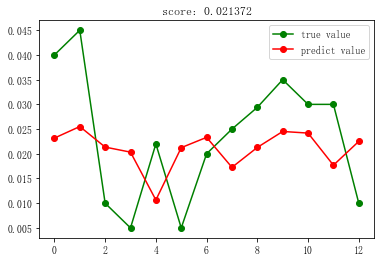

In [117]:
show_result(model_LinearRegression)

**岭回归**

In [148]:
train_new_data=train_data[["净利润增长率","固定资产周转率","前三年承诺覆盖率","应收账款周转率"]]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[["净利润增长率","固定资产周转率","前三年承诺覆盖率","应收账款周转率"]]
test_new_X=scaler.transform(test_new_data)

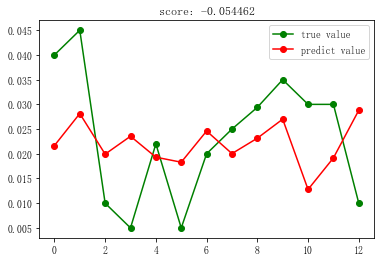

In [149]:
show_result(model_RidgeCV)

**AdaBoost**

In [139]:
selected_feature=['前三年承诺覆盖率', '动态市盈率', '成立年限', '净利润增长率', '固定资产周转率']

In [140]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[selected_feature]
test_new_X=scaler.transform(test_new_data)

In [143]:
model_AdaBoostRegressor=ensemble.AdaBoostRegressor(base_estimator= tree.DecisionTreeRegressor(max_depth=3),learning_rate=0.5, n_estimators=50)

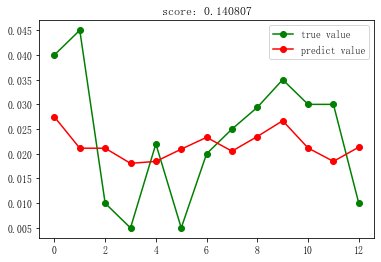

In [147]:
show_result(model_AdaBoostRegressor)

**MLP**

In [176]:
train_new_data=train_data[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[["前三年承诺覆盖率", "成立年限", "净利润增长率", "固定资产周转率", "动态市盈率", "总资产周转率", "归母权益增长率"]]
test_new_X=scaler.transform(test_new_data)

In [177]:
model_MLPRegressor=MLPRegressor(activation='relu', alpha= 0.0001, hidden_layer_sizes= (5, 5, 5, 5), learning_rate= 'constant', solver= 'lbfgs')

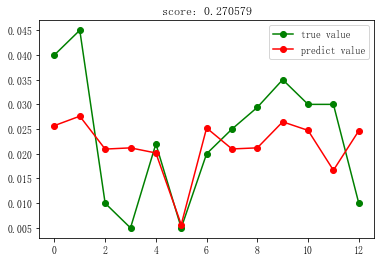

In [178]:
show_result(model_MLPRegressor)

**XGBoost**

In [154]:
selected_feature=["净利润增长率","前三年承诺覆盖率","静态市盈率","D/(D+E)","研发支出占比","成立年限","总资产增长率","大股东持股比例","动态市盈率","总资产周转率","经营杠杆（EBITDA/EBIT)","上一年归母净利润（万元）","流动比率","资产负债率","承诺期业绩增长率","注入资产净资产账面值(万元)","归母权益增长率","固定资产周转率","最近一个完整会计年度对第一供应商的采购占比","在建工程/归母权益","最近一个完整会计年度对第一大客户的销售占比","毛利率","净资产收益率"]

In [155]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[selected_feature]
test_new_X=scaler.transform(test_new_data)

In [156]:
model_XGBRegressor= xgb.XGBRegressor(booster='dart', eta= 0.2, gamma= 0, max_depth= 9, min_child_weight= 10)

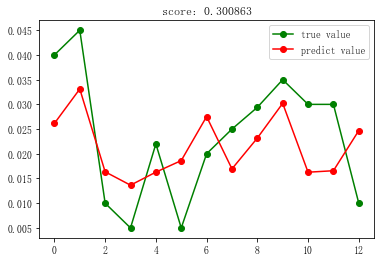

In [157]:
show_result(model_XGBRegressor)

**LGBM**

In [150]:
selected_feature=["承诺期业绩增长率","总资产增长率","净资产收益率","大股东持股比例","D/(D+E)","动态市盈率","上一年归母净利润（万元）","前三年承诺覆盖率","净利润增长率","毛利率","成立年限","归母权益增长率","资产负债率"]

In [151]:
train_new_data=train_data[selected_feature]
train_new_X=scaler.fit_transform(train_new_data)
test_new_data=test_data[selected_feature]
test_new_X=scaler.transform(test_new_data)

In [152]:
model_LGBM=lgb.LGBMRegressor(cat_smooth=0, max_depth=4, min_child_samples=19, min_child_weight=0.001, num_leaves=20)

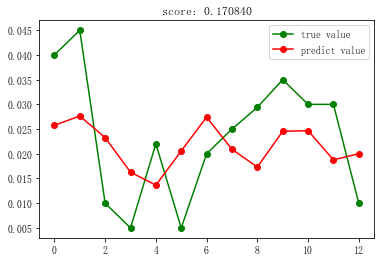

In [153]:
show_result(model_LGBMRegressor)

对于测试集各模型的表现如下

**结果对比**<br>

| 模型 | 5折交叉验证预期 | 测试集表现 |
|------|----------|------|
| XGBOOST回归   | 0.1311 | 0.3008  |
| 神经网络回归  | 0.2182 | 0.2706 |
| LGBM回归     | 0.2088 | 0.17084    |
| Adaboost回归  | 0.1863 | 0.1408   |
|线性回归|0.1288 | 0.0214 |
|岭回归| 0.1834 | -0.0545 |

 &emsp;测试集的表现和训练集的表现有很大的差别,5-折交叉验证只能作为一个参考，最好还是通过大量数据集将数据分成训练集、验证集、测试集。交叉验证的平均值并不能完全表现一个模型的表现,特别是当某一个组别的得分远远低于其他分组时，平均值会产生很大的误导。特别是岭回归表现垫底出乎意外。<br>
 &emsp;需要指出的是，虽然K折交叉验证的结果往往不具备模型间的可比较性，但是往往能选择出模型中最好的特征和超参数组合。<br>
 &emsp;非线性模型由于模型的复杂度因此往往能取得更好的表现。但同时由于非线性模型的复杂，其往往对异常值比较敏感，在原版无筛选异常值的情况下，LGBM模型和XGBoost模型的表现在测试集上垫底。

## 5 展望

&emsp;由于本次的因变量的分布较为集中，因此可以将其转换为1-5档的多分类问题后，再根据实际情况在相应区间内进行调整。(比如通过KNN的方法，基于相似的公司具有相同的特有风险的假设，寻找K家比较相似的公司，对新样本进行预测。在《特有风险raw》中已经给出了展示，在测试集上具有不错的成绩。)<br>
&emsp; 对于行业的分类也可以作为一个变量，通过编码的方式作为机器学习的一个属性。<br>
&emsp;从交叉验证的结果中可以看出，不同的抽样会导致模型的得分具有很大的差别。因此原始数据集存在特殊值，可以进一步优化。比如，手动KFold分组，根据结果求差集。或者使用留一交叉验证进行筛选。使用ifroest或者One-SVM根据实际结果来看使得模型表现结果变差。具体原因待后续研究。<br>
&emsp;RFECV是基于他贪心算法进行特征选择。由于组合最优化问题往往是NPC问题。因此考虑通过如模拟退火、遗传算法、蚁群算法等现在启发式算法进行优化，得出最优解。并且这些算法不会再被coef_ 或者 feature_importance这种系数属性所限制，具有更广泛的通用性。<br>
&emsp;机器学习的特征选择只对根据变量和因变量的相关性进行研究，并计算出相应的答案；并不能说明之间存在因果关系。在实际评估的过程中依旧需要根据会计和评估常识进行鉴别。此外，由于模型的复杂度和不可解释性，建议在小样本上依旧使用传统的基于方程的数学模型。<br>
&emsp;并且由于机器学习模型的复杂性，当我们发现某一个参数或者特征存在问题时，我们往往无法手动像线性回归一样手动调整一因子解决问题，而只能通过调整样本的权重或者输入更多的数据来解决问题。<br>
&emsp;机器学习需要建立在大量数据集的基础上。从《特有风险short》和《特有风险raw》的对比中我们可以看出，相比传统的基于方程的数学模型，机器学习模型超参数的选择更容易受到超参数和异常值的影响，因此需要通过对异常值进行筛选，并通过海量数据来消除随机梯度下降的随机性对超参数的影响，从而获得更好的超参数。

&emsp;对于业务是否要引入AI或者机器学习算法，可以从以下几个角度进行分析
1. 问答表现出来的特征是不是很多？
2. 特征是否具有很强的不确定性？
3. 问题的相关数据可以获取吗？
4. 获取的数据够全面吗，关键因素的数据可以获取吗？
5. 能获取的数据量大吗，当业务遇到问题时，有反馈数据吗？
6. 反馈数据可以跟其他数据形成闭环吗？
7. 是否不需要解释背后的原因
8. 这个问题允许出错吗？

对上述问题有越多的“是”回答，则越适合用机器学习。

具体可以用如下几张图说明：<br>
<img src="https://easy-ai.oss-cn-shanghai.aliyuncs.com/2019-11-26-xiangxian.png" width="50%">
<img src="https://easy-ai.oss-cn-shanghai.aliyuncs.com/2019-12-03-data-3.png" width="50%">
<img src="https://easy-ai.oss-cn-shanghai.aliyuncs.com/2019-12-12-xiangxian-1.png" width="50%">